In [2]:
%tensorflow_version 1.x
import tensorflow as tf
print("TensorFlow version of this code is:",tf.__version__)

#  ------------------- Importing libraries ------------------
import numpy as np
import matplotlib.pyplot as plt

# -------- the code below is for uploading the data2D.npy or data100D.npy file to the code --------
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

TensorFlow version of this code is: 1.15.2


Saving data2D.npy to data2D.npy
User uploaded file "data2D.npy" with length 160080 bytes


In [3]:

# -------- the code below is for uploading the helper.py file to the code --------
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving helper.py to helper.py
User uploaded file "helper.py" with length 1289 bytes


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp
 

In [5]:
# Distance function for K-means
def distance_func(X, mu):
    """ Inputs:
          X: is an NxD matrix (N observations and D dimensions)
          mu: is an KxD matrix (K means and D dimensions)
          
        Output:
          pair_dist: is the squared pairwise distance matrix (NxK)
    """

    x_dummy = tf.expand_dims(x, 1)
    mu_dummy = tf.expand_dims(mu, 0)
    pair_dist = tf.reduce_sum(tf.square(tf.subtract(x_dummy, mu_dummy)),2)
    
    return pair_dist


In [6]:
def assign_cluster(X, mu):
  
  pair_dist = distance_func(X, mu)
  cluster = tf.argmin(pair_dist, 1)

  return cluster

In [11]:
def k_means(x, mu, K, is_valid, data, iteration, option=0):

  [num_pts, dim] = np.shape(data)
  # For Validation set
  if is_valid:
    valid_batch = int(num_pts / 3.0)
    np.random.seed(45689)
    rnd_idx = np.arange(num_pts)
    np.random.shuffle(rnd_idx)
    val_data = data[rnd_idx[:valid_batch]]
    data = data[rnd_idx[valid_batch:]]
    valid_losses = []

  losses=[]

  pair_dist = distance_func(x, mu)
  loss = tf.reduce_sum(tf.reduce_min(pair_dist, axis=1))
  optimizer = tf.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.99, epsilon=1e-5).minimize(loss)

  tf_init = tf.global_variables_initializer()
  sess = tf.Session()
  sess.run(tf_init)

  for iter in range(iteration):
    iter_mu, iter_loss, _ = sess.run([mu, loss, optimizer], feed_dict={x:data})
    losses.append(iter_loss)

    if is_valid:
      iter_mu_valid, iter_loss_valid, _ = sess.run([mu, loss, optimizer], feed_dict={x:val_data})
      valid_losses.append(iter_loss_valid)
        
    if iter%100 == 0:
      print("K = ", K, ", Update # = ", iter, "Loss value = ", iter_loss)

  #assigning clusters
  clusterFinal = sess.run(assign_cluster(x, mu), feed_dict={x:data, mu:iter_mu})

  trainPercent = np.zeros(K)

  for i in range(K):
    trainPercent[i]=np.sum(np.equal(i, clusterFinal))*100.0/len(clusterFinal)

  if option==1:
    x1 = range(len(losses))
    y1 = losses
    plt.plot(x1,y1, label="Loss")
    plt.legend(loc="best")
    plt.title('Loss vs. Number of updates')
    plt.xlabel('Number of updates')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

  if option==2:
    k1 = len(iter_mu)
        
    for i in range(K):

      x2 = data[clusterFinal == i, 0]
      y2 = data[clusterFinal == i, 1]
      round_trainpercent = str(np.round_(trainPercent[i],decimals=2))+'%'
      plt.scatter(x2, y2, label=round_trainpercent)

    x3 = iter_mu[:, 0]
    y3 = iter_mu[:, 1]
    plt.scatter(x3, y3, marker='*', c="black")
    plt.legend(loc='upper center', bbox_to_anchor = (0.5,1.12), fancybox=True, ncol=K)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('K = '+str(K)+', Validation Loss = '+str(valid_losses[-1]), y=-0.23)
    plt.grid()
    plt.show()

    if option==3:
      plt.figure(1)

  #return losses
  return valid_losses

K =  3 , Update # =  0 Loss value =  39821.035
K =  3 , Update # =  100 Loss value =  5111.7573


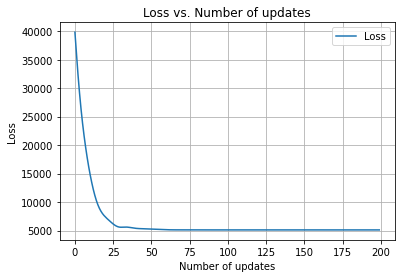

In [12]:
if __name__ == "__main__":

      # Loading data
      data = np.load('data2D.npy')
      #data = np.load('data100D.npy')

      [N, D] = np.shape(data)
      
      # part 1.1.1:
      K = 3
      x = tf.placeholder("float", shape=[None, D])
      mu = tf.Variable(tf.truncated_normal([K,D]))
      # plot of loss vs. updates
      k_means(x, mu, K, False, data, 200, 1)
      
      
      # part 1.1.2:
      K = 1
      x = tf.placeholder("float", shape=[None, D])
      mu = tf.Variable(tf.truncated_normal([K,D]))
      k_means(x, mu, K, True, data, 200, 2)
      
      K = 2
      x = tf.placeholder("float", shape=[None, D])
      mu = tf.Variable(tf.truncated_normal([K,D]))
      k_means(x, mu, K, True, data, 200, 2)
      
      K = 3
      x = tf.placeholder("float", shape=[None, D])
      mu = tf.Variable(tf.truncated_normal([K,D]))
      k_means(x, mu, K, True, data, 200, 2)
      
      K = 4
      x = tf.placeholder("float", shape=[None, D])
      mu = tf.Variable(tf.truncated_normal([K,D]))
      k_means(x, mu, K, True, data, 200, 2)
      
      K = 5
      x = tf.placeholder("float", shape=[None, D])
      mu = tf.Variable(tf.truncated_normal([K,D]))
      k_means(x, mu, K, True, data, 200, 2)
      
      # part 2.2.3 (K-Means):
      K5 = 5
      x = tf.placeholder("float", shape=[None, D])
      mu = tf.Variable(tf.truncated_normal([K5,D]))
      val_loss_5 = k_means(x, mu, K5, True, data, 200, 3)
      
      K10 = 10
      x = tf.placeholder("float", shape=[None, D])
      mu = tf.Variable(tf.truncated_normal([K10,D]))
      val_loss_10 = k_means(x, mu, K10, True, data, 200, 3)
      
      K15 = 15
      x = tf.placeholder("float", shape=[None, D])
      mu = tf.Variable(tf.truncated_normal([K15,D]))
      val_loss_15 = k_means(x, mu, K15, True, data, 200, 3)

      K20 = 20
      x = tf.placeholder("float", shape=[None, D])
      mu = tf.Variable(tf.truncated_normal([K20,D]))
      val_loss_20 = k_means(x, mu, K20, True, data, 200, 3)
      
      K30 = 30
      x = tf.placeholder("float", shape=[None, D])
      mu = tf.Variable(tf.truncated_normal([K30,D]))
      val_loss_30 = k_means(x, mu, K30, True, data, 200, 3)
      
      plt.plot(range(len(val_loss_5)), val_loss_5, label="K = 5")
      plt.plot(range(len(val_loss_10)), val_loss_10, label="K = 10")
      plt.plot(range(len(val_loss_15)), val_loss_15, label="K = 15")
      plt.plot(range(len(val_loss_20)), val_loss_20, label="K = 20")
      plt.plot(range(len(val_loss_30)), val_loss_30, label="K = 30")
      plt.legend(loc="best")
      plt.title('Validation Loss for KMeans vs. Number of updates - Dataset = data100D.npy')
      plt.xlabel('Number of updates')
      plt.ylabel('Validation Loss')
      plt.grid()
      plt.show()
      




In [ ]:
print("final valid loss for K = 5 => ", val_loss_5[-1])
print("final valid loss for K = 10 => ", val_loss_10[-1])
print("final valid loss for K = 15 => ", val_loss_15[-1])
print("final valid loss for K = 20 => ", val_loss_20[-1])
print("final valid loss for K = 30 => ", val_loss_30[-1])